This Notebook is meant for the analysis of demographics survey data and extract the appropriate set of subjects from the mPower data.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from pydub import AudioSegment
import scipy.signal as sg
import sys

ModuleNotFoundError: No module named 'pydub'

In [2]:
data = pd.read_csv('Demographics_Survey.csv');
data = data.drop(columns = ['ROW_ID','ROW_VERSION','createdOn','appVersion','phoneInfo']);

C:\Users\eelab\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


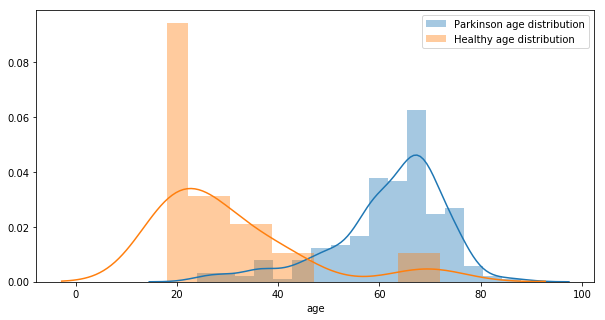

In [3]:
#the feature that points to whether a person has Parkinson's or not is the professional diagnosis column. 
#since, smoking can effect the voice samples, I am excluding them from the dataset for the true distinction between Parkinson's 
#and healthy patients.
#age is set to greater than 42 because clinically diagnosed samples are concentrated after 42.
#lets ignore health history for now! 
plt.figure(figsize=(10,5))
sns.distplot(data[data['professional-diagnosis'] == True].dropna().age,label='Parkinson age distribution');
sns.distplot(data[data['professional-diagnosis'] == False].dropna().age,label='Healthy age distribution',bins=13);
plt.legend();

In [4]:
demo_data = data.loc[(data['smoked'] == False)]; #& (data['age'] > 25)
#UPDATE: I've removed the age restriction because for the current policy, the parkinson's people had recorded 
#abnormally high number of recordings!
print('Parkinson\'s Patient count:',len(demo_data[demo_data['professional-diagnosis'] == True]))
print('Healthy Patient count:',len(demo_data[demo_data['professional-diagnosis'] == False]))
#data['medication-start-year'].unique()
#print(len(temp[temp['professional-diagnosis'] == False]))

Parkinson's Patient count: 717
Healthy Patient count: 3443


In [5]:
voice_data = pd.read_csv('Voice Activity.csv')
voice_data.drop(columns = ['ROW_ID','ROW_VERSION','appVersion','phoneInfo','createdOn'],inplace=True)
voice_data = voice_data[voice_data['medTimepoint'] != 'Just after Parkinson medication (at your best)'];

In [6]:
voice_data[voice_data['healthCode'] == '67bdd316-26fc-4fc7-8431-bf9f41a649dd']

,recordId,healthCode,audio_audio.m4a,audio_countdown.m4a,medTimepoint
2,0e85415c-75ee-45d2-8d38-ac7b2c8c5c50,67bdd316-26fc-4fc7-8431-bf9f41a649dd,5390859,5390881,I don't take Parkinson medications
5,44639dde-a9c7-43af-b41a-9125507d088a,67bdd316-26fc-4fc7-8431-bf9f41a649dd,5390492,5390504,I don't take Parkinson medications
6,a1927252-6e3b-4505-9142-667f9ffbb57b,67bdd316-26fc-4fc7-8431-bf9f41a649dd,5400993,5401008,I don't take Parkinson medications


In [7]:
#voice_data.set_index('healthCode').loc['67bdd316-26fc-4fc7-8431-bf9f41a649dd']
#this block takes the intersection between people selected in demographics data and the people whose recordings we are using
c1 = voice_data['healthCode'].unique().tolist();
c2 = demo_data['healthCode'].unique().tolist();
c3 = list(filter(lambda x: x in c1, c2))
print(len(c2))

4237


In [8]:
voice_data = voice_data.set_index(['healthCode','recordId']).sort_index();
voice_data.head()

audio_audio.m4a  \
healthCode                           recordId                                                
000240d1-1110-4dd2-a2d0-e344c37efd68 ecd5c2ca-0029-411e-8eea-98b4e435f49c          5559342   
00081bd9-9abd-4003-b035-de6cc3e8c922 f5f9fe7a-16ea-4729-ad36-4adf16d640d3          5911541   
00290381-e82e-46b2-b4e6-df115823d71b 1cef82c9-11cd-4835-b071-bca252a04034          5399659   
00547584-0c04-4228-a5d5-c68f7d59f176 0a6cde8e-cf2c-4632-a526-93fe8541c4a2          5882110   
                                     468e3591-50ef-43e4-b95c-71700912b131          5796594   

                                                                           audio_countdown.m4a  \
healthCode                           recordId                                                    
000240d1-1110-4dd2-a2d0-e344c37efd68 ecd5c2ca-0029-411e-8eea-98b4e435f49c              5559429   
00081bd9-9abd-4003-b035-de6cc3e8c922 f5f9fe7a-16ea-4729-ad36-4adf16d640d3              5911575   
00290381-e82e-46b2-b4e6-df115823d71b 1cef82c9-11cd-4835-b071-bca252a04034              5399675   
00547584-0c04-4228-a5d5-c68f7d59f176 0a6cde8e-cf2c-4632-a526-93fe8541c4a2              5882147   
                                     468e3591-50ef-43e4-b95c-71700912b131              5796641   

                                                                                                 medTimepoint  
healthCode                           recordId                                                                  
000240d1-1110-4dd2-a2d0-e344c37efd68 ecd5c2ca-0029-411e-8eea-98b4e435f49c  I don't take Parkinson medications  
00081bd9-9abd-4003-b035-de6cc3e8c922 f5f9fe7a-16ea-4729-ad36-4adf16d640d3  I don't take Parkinson medications  
00290381-e82e-46b2-b4e6-df115823d71b 1cef82c9-11cd-4835-b071-bca252a04034  I don't take Parkinson medications  
00547584-0c04-4228-a5d5-c68f7d59f176 0a6cde8e-cf2c-4632-a526-93fe8541c4a2  I don't take Parkinson medications  
                                     468e3591-50ef-43e4-b95c-71700912b131  I don't take Parkinson medications

In [9]:
voice_data = voice_data.loc[c3,:]
voice_data.head()
#now, only these are the audio files that are necessary!

audio_audio.m4a  \
healthCode                           recordId                                                
00290381-e82e-46b2-b4e6-df115823d71b 1cef82c9-11cd-4835-b071-bca252a04034          5399659   
00a78d55-a227-4944-b6e2-a8a8f9034f24 22cc4bed-d953-4493-b3bc-17d2c8ff1907          5515906   
00dc061b-8151-44cc-8eae-4d10f11a5ab6 006cd5f1-a549-4836-b9ea-49ffaf4ff1c5          5623237   
                                     00774190-9fb8-4608-b56c-16d931e72ab1          5734951   
                                     028841ce-533d-45d2-a07f-2b8451b8645c          5460625   

                                                                           audio_countdown.m4a  \
healthCode                           recordId                                                    
00290381-e82e-46b2-b4e6-df115823d71b 1cef82c9-11cd-4835-b071-bca252a04034              5399675   
00a78d55-a227-4944-b6e2-a8a8f9034f24 22cc4bed-d953-4493-b3bc-17d2c8ff1907              5515945   
00dc061b-8151-44cc-8eae-4d10f11a5ab6 006cd5f1-a549-4836-b9ea-49ffaf4ff1c5              5623384   
                                     00774190-9fb8-4608-b56c-16d931e72ab1              5734995   
                                     028841ce-533d-45d2-a07f-2b8451b8645c              5460718   

                                                                                                      medTimepoint  
healthCode                           recordId                                                                       
00290381-e82e-46b2-b4e6-df115823d71b 1cef82c9-11cd-4835-b071-bca252a04034       I don't take Parkinson medications  
00a78d55-a227-4944-b6e2-a8a8f9034f24 22cc4bed-d953-4493-b3bc-17d2c8ff1907       I don't take Parkinson medications  
00dc061b-8151-44cc-8eae-4d10f11a5ab6 006cd5f1-a549-4836-b9ea-49ffaf4ff1c5  Immediately before Parkinson medication  
                                     00774190-9fb8-4608-b56c-16d931e72ab1  Immediately before Parkinson medication  
                                     028841ce-533d-45d2-a07f-2b8451b8645c                             Another time

In [10]:
#constructing target series with respect to healthCode
Y = demo_data.set_index('healthCode').loc[c3]['professional-diagnosis']

In [11]:
#len(voice_data)
#so, so far Y contains the target variables with respoect to healthCode
#and voice_data contains all the healthCode audio_file codes and recordIds (which contain the repitition of activity by
#the same person)
voice_data.index = voice_data.index.droplevel(1)
print('Total',len(voice_data),'patients');
voice_data.head()
#this command deletes the record Ids and awards duplicate healthcode indices to multiple recordings by the same patient

Total 35378 patients


,audio_audio.m4a,audio_countdown.m4a,medTimepoint
healthCode,,,
00290381-e82e-46b2-b4e6-df115823d71b,5399659,5399675,I don't take Parkinson medications
00a78d55-a227-4944-b6e2-a8a8f9034f24,5515906,5515945,I don't take Parkinson medications
00dc061b-8151-44cc-8eae-4d10f11a5ab6,5623237,5623384,Immediately before Parkinson medication
00dc061b-8151-44cc-8eae-4d10f11a5ab6,5734951,5734995,Immediately before Parkinson medication
00dc061b-8151-44cc-8eae-4d10f11a5ab6,5460625,5460718,Another time


In [12]:
Ytemp = Y[voice_data.index.values];
nullind = np.where(np.asanyarray(np.isnan(Ytemp.values.astype(float))))[0].tolist()
voice_data = voice_data.reset_index().drop(nullind).set_index('healthCode');
#this block drops the values where we have nan as parkinson professional diagnosis value

In [14]:
def update_progress(progress):
    barLength = 30 # Modify this to change the length of the progress bar
    status = ""
    if isinstance(progress, int):
        progress = float(progress)
    if not isinstance(progress, float):
        progress = 0
        status = "error: progress var must be float\r\n"
    if progress < 0:
        progress = 0
        status = "Halt...\r\n"
    if progress >= 1:
        progress = 1
        status = "Done...\r\n"
    block = int(round(barLength*progress))
    text = "\rPercent: [{0}] {1}% {2}".format( "#"*block + "-"*(barLength-block), progress*100, status)
    sys.stdout.write(text)
    sys.stdout.flush()

In [15]:
pad = lambda a,i : a[0:i] if len(a) > i else np.concatenate((a, [0] * (i-len(a)))) #for fixing things to a fixed length
sample_len = 44100; #sample Fs is 44100. After 10x decimation, a 10-sec recording should have 44.1k Samples
err_samples = [];
j = True;
k = 0;
parts = 500;
#X = np.array((sample_len));
#lets start extracting samples!

for i in range(len(voice_data)):
    path = 'D:\\Projects\\Parkinson Diagnosis\\mPower\\Voice Data\\Audio\\'+str(voice_data['audio_audio.m4a'].iloc[i]) + '.m4a';
    try:
        audio = np.array(AudioSegment.from_file(path).get_array_of_samples().tolist());
        audio = audio/audio.max() #Normalize the PCM waveform
        deci = sg.decimate(x=audio,q=10) #lets decimate
        deci = pad(deci,sample_len); #lets fix the sample length! so that we have no problems in concatenation!
        #plt.plot(np.abs(np.fft.fftshift(np.fft.fft(deci)))) #If you want to visualize the fft of the thing!
        if(j is True): 
            X = deci;
            X = np.expand_dims(X,axis=0);
            j = False;
        else: X = np.vstack((X,deci))
        
        if(X.shape[0] % parts == 0):
            np.save('X_sec'+str(k)+'.npy',X)
            k = k + 1;
            j = True;
    except:
        err_samples.append(i);
    update_progress((i+1)/len(voice_data));
np.save('X_sec'+str(k)+'.npy',X)

Percent: [------------------------------] 0.005687958591661452% 

C:\Users\eelab\Anaconda3\lib\site-packages\scipy\signal\_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]
C:\Users\eelab\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:3463: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return y[sl]


Percent: [####################----------] 66.97855639610944%    

C:\Users\eelab\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  


Percent: [##############################] 100% Done...70417% 


In [16]:
voice_data = voice_data.reset_index().drop(err_samples).set_index('healthCode');
voice_data.head()

,audio_audio.m4a,audio_countdown.m4a,medTimepoint
healthCode,,,
00290381-e82e-46b2-b4e6-df115823d71b,5399659,5399675,I don't take Parkinson medications
00a78d55-a227-4944-b6e2-a8a8f9034f24,5515906,5515945,I don't take Parkinson medications
00dc061b-8151-44cc-8eae-4d10f11a5ab6,5623237,5623384,Immediately before Parkinson medication
00dc061b-8151-44cc-8eae-4d10f11a5ab6,5734951,5734995,Immediately before Parkinson medication
00dc061b-8151-44cc-8eae-4d10f11a5ab6,5460625,5460718,Another time


In [17]:
len(voice_data)

35131

In [18]:
Y = Y[voice_data.index.values];
##Now, Y is a series with indications of which recording is Parkinson's or not
#(Y==True).sum()/(Y == False).sum()
print(Y.shape)
Y.head()

(35131,)


healthCode
00290381-e82e-46b2-b4e6-df115823d71b    False
00a78d55-a227-4944-b6e2-a8a8f9034f24    False
00dc061b-8151-44cc-8eae-4d10f11a5ab6     True
00dc061b-8151-44cc-8eae-4d10f11a5ab6     True
00dc061b-8151-44cc-8eae-4d10f11a5ab6     True
Name: professional-diagnosis, dtype: object

In [21]:
#Y.index[Y.apply(np.isnan)]

#Y.values.astype(float)
#35347 -((Y==True).sum() + (Y == False).sum())
#np.save('Y.npy',Y)
(Y==False).sum()

14881